# Problema da Mochila Binária

## Exploration vs. Exploitation por Algoritmos Genéticos

![https://miro.medium.com/max/1156/1*G9WdXqxj016CaAX9zrFewQ.jpeg](https://miro.medium.com/max/1156/1*G9WdXqxj016CaAX9zrFewQ.jpeg)

# Função de Fitness

![https://miro.medium.com/max/744/1*fenR6vIzGliZ6IfnR83stw.gif](https://miro.medium.com/max/744/1*fenR6vIzGliZ6IfnR83stw.gif)

![https://miro.medium.com/max/482/1*upStA6rK51fNybBWdifpqg.gif](https://miro.medium.com/max/482/1*upStA6rK51fNybBWdifpqg.gif)


Onde:

$n$ = tamanho de um cromossomo (solução de nosso problema)

$c_i$ = o i-ésimo gene

$v_i$ = o valor do i-ésimo gene

$W_i$ = o peso do i-ésimo gene

$kw$ = capacidade da mochila

# Configuração

In [202]:
# Remove possível repositório já existente
%cd "../.."
! rm -rf Genetic-Algorithm-Backpack-problem

/


In [203]:
# Clonando repositorio com as implementações:
!git clone https://github.com/leticiacb1/Genetic-Algorithm-Backpack-problem.git

Cloning into 'Genetic-Algorithm-Backpack-problem'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 99 (delta 28), reused 93 (delta 25), pack-reused 0
Receiving objects: 100% (99/99), 12.54 KiB | 6.27 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [204]:
# Entrando na pasta
%cd Genetic-Algorithm-Backpack-problem

/Genetic-Algorithm-Backpack-problem


# Roda implementação

In [243]:
!g++ -Wall -O3 -g \
    src/utils/crossover.cpp \
    src/utils/fitness.cpp \
    src/utils/mutation.cpp \
    src/utils/optimize.cpp \
    src/utils/selection.cpp \
    src/main.cpp \
    -o main

In [244]:
!./main

Possíveis itens:
Item	Peso	Valor
1	9	30
2	3	16
3	12	57
4	1	19
5	10	16
6	9	50
7	5	9
8	3	56
9	13	84
10	14	24
11	13	69
12	8	39
13	4	35
14	4	88
15	3	13
16	4	70
17	8	96
18	1	75
19	12	90
20	1	97
21	14	37
22	8	18
23	6	70
24	4	7
25	10	88
26	10	35
27	9	41
28	10	72
29	12	75
30	11	12
31	4	31
32	9	27
33	2	64
34	13	77
35	5	91
36	1	55
37	3	17
38	1	70
39	4	42
40	7	38
Tamanho da população = {16, 40}
População inicial:
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 
 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 
 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 
 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 
 0 1 1 0 0 1 0 0 1 1



```
Constroi o gráfico
```



In [253]:
def process_return(stdout_result):

  # ------ Find Fitness_History -----
  aux1 = stdout_result.split("> Fitness_History : ")
  aux1 = aux1[1]
  aux1 = aux1.split("> Num_generations")
  aux1 = aux1[0]
  aux1 = aux1.replace("\n", "")

  aux1 = aux1.split(":")

  fitness_history = [string_to_list(s) for s in aux1]

  # ------ Find Num_generations -----
  aux2 = stdout_result.split("> Num_generations")
  aux2 = aux2[1].replace("\n", "")
  aux2 = aux2.replace(":", "")
  num_generations = int(aux2.strip())

  return fitness_history, num_generations

# Função para converter uma string em uma lista de inteiros
def string_to_list(s):
    return [int(num) for num in s.strip('[] ').split(',') if num.strip()]

In [254]:
import subprocess

stdout = subprocess.run('./main', stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
stdout_result = stdout.stdout

fitness_history, num_generations = process_return(stdout_result)

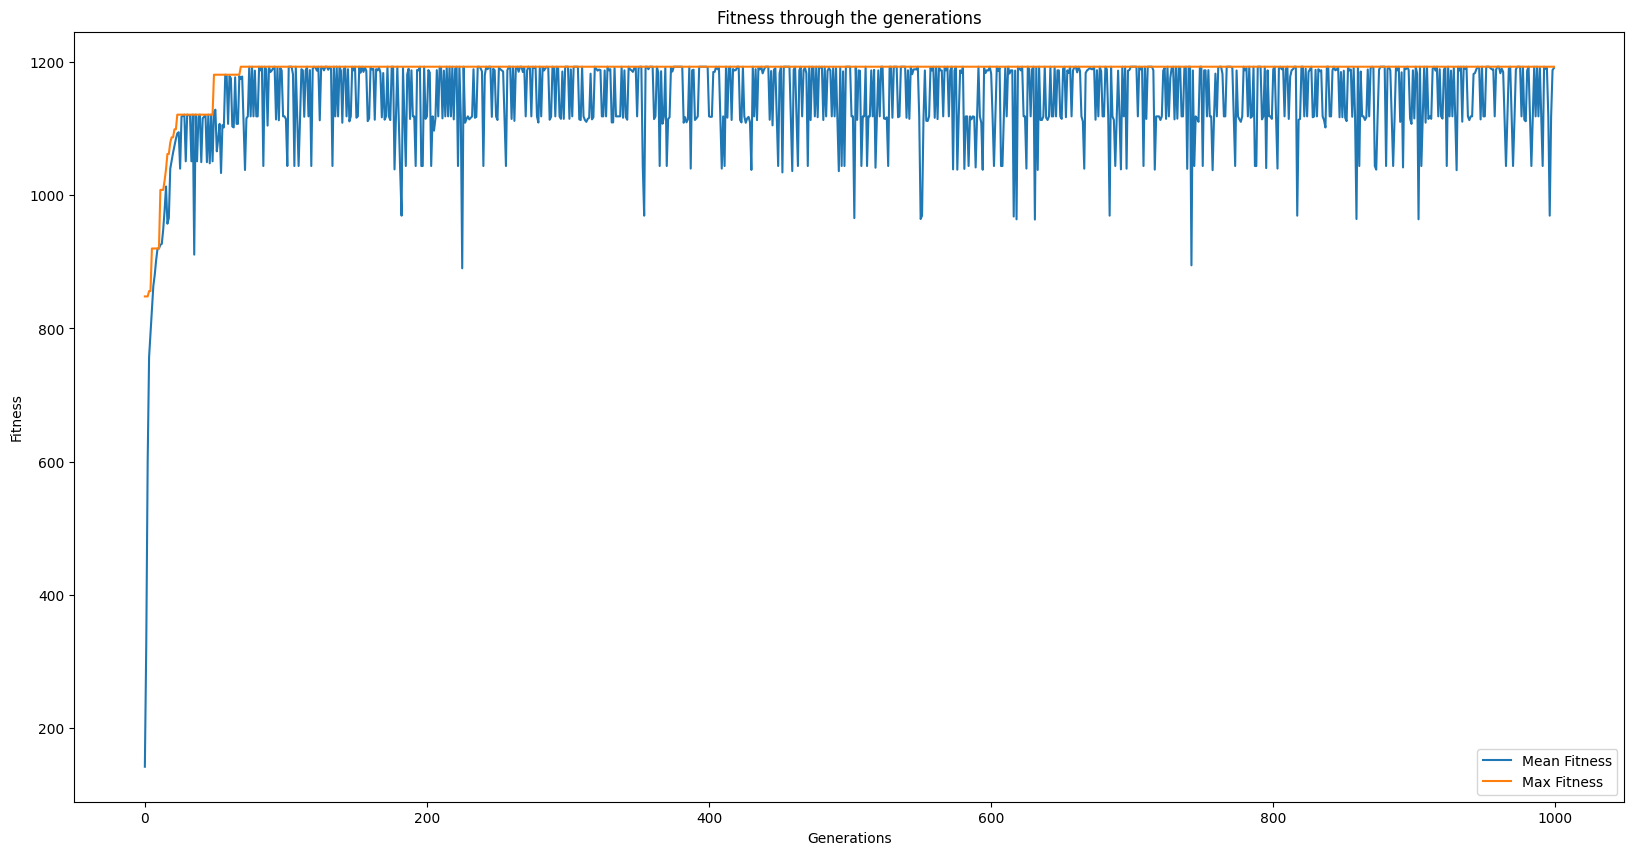

(1001,)


<ipython-input-255-cd15db3613cd>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.asarray(fitness_history).shape)


In [255]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) if len(fitness) > 0 else np.nan for fitness in fitness_history]
plt.plot(list(range(num_generations+1)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations+1)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)